## Región de estabilidad de los métodos de integración 
#### Joaquín Pelle

### Introducción

Consideremos un problema de valores iniciales

\begin{align*}
\frac{du}{dt} &= f(u,t) \,, \\
u(t_0) &= u_0\,,
\end{align*}

con $u\colon I \to \mathbb{C}$, donde $I \subset \mathbb{R}$ es un intervalo. Los llamados *métodos de integración de un paso* son algoritmos de la forma

\begin{align*}
v_{n+1} &= v_n + \Delta t F(v_{n},t,\Delta t)\,, \\
v_0 &= u_0\,,
\end{align*}

con $t_n = t_0+n \Delta t$, donde $v_{n}$ es el valor aproximado de $u(t_n)$. Cada método corresponderá a una distinta función $F(v_{n},t,\Delta t)$. Para definir la región de estabilidad de un método, consideramos el problema particular

\begin{align}
\frac{du}{dt} &= \lambda u\,, \\
u(t_0) &= u_0\,,
\end{align}

con $\lambda \in \mathbb{C}$, cuya solución es

\begin{align}
u(t) &= u_0 e^{\lambda (t-t_0)} \,
\end{align}

(notemos que si $\mathrm{Re}(\lambda) \leq 0$, el módulo de la solución no puede crecer). En el caso de esta ecuación, muchos de los métodos de un paso toman la forma

\begin{align*}
v_{n+1} &= [ 1+ A(\lambda \Delta t) ] v_n \,, \\
v_0 &= u_0\,,
\end{align*}

donde $A$ es una función que sólo depende del producto $\lambda \Delta t$. Esta subclase de métodos de un paso es suficientemente general como para incluir a los más comunes, como los de Euler, Heun, Runge-Kutta, etc. Bajo estas condiciones, podemos definir la **región de estabilidad** del método como la región

\begin{equation*}
S = \{ \mu \in \mathbb{C}: |1+A(\mu)| \leq 1  \}\,.
\end{equation*}

En otras palabras, es la región donde el factor de amplificación del método para la ecuación $u_t = \lambda u$ es menor o igual que $1$.

Incluso si la solución exacta se mantiene acotada ($\mathrm{Re}(\lambda) \leq 0$), el factor de amplificación de un método puede resultar mayor que $1$ si el paso $\Delta t$ no es suficientemente pequeño. En ese caso los valores $v_n$ se volverán arbitrariamente grandes, y la aproximación numérica no será útil. Por lo tanto, de ser posible, debemos elegir un paso temporal lo suficientemente pequeño como para que $\lambda \Delta t$ se encuentre dentro de la región de estabilidad del método, de modo que la solución numérica no diverja. 

A pesar de que la región de estabilidad está definida según el comportamiento del método para la ecuación $u_t = \lambda u$, el concepto tiene importancia en general. Si queremos resolver una  ecuación genérica 

\begin{align*}
\frac{du}{dt} &= f(u,t) \,, \\
u(t_0) &= u_0\,,
\end{align*}

con algún método, buscaremos que el paso temporal sea lo suficientemente pequeño como para que $\lambda_n \Delta t$ se encuentre dentro de la región de estabilidad, donde ahora
\begin{equation}
\lambda_n = \frac{\partial f}{\partial y}(v_n,t_n)\,
\end{equation}
(esto puede conducir a la necesidad de un método adaptativo).


A modo de ejemplo, consideremos el método de Euler explícito, que para la ecuación $u_t = \lambda u$ se reduce simplemente a 

\begin{align*}
v_{n+1} &= (1+ \lambda \Delta t) v_n \,, \\
v_0 &= u_0\,.
\end{align*}

Luego, la región de estabilidad es
\begin{equation}
S_{\mathrm{Euler}} = \{ \mu \in \mathbb{C}: |1+\mu| \leq 1  \}\,,
\end{equation}

es decir, el círculo de radio $1$ centrado en $-1$. Por ejemplo, para la ecuación $u_t =-5u$ no podemos tomar $\Delta t > 2/5$, pues $\lambda \Delta t$ caería fuera de la región de estabilidad y las aproximaciones sucesivas por el método de Euler crecerían sin cota, a pesar de que la solución exacta decae como $e^{-5t}$. Aún peor, para la ecuación $u_t = i u$, cuya solución exacta oscila con módulo constante, el método de Euler resulta inestable para cualquier $\Delta t > 0$.

---

### Cálculo numérico de las regiones de estabilidad

En este notebook encontrarán funciones que permiten graficar la región de estabilidad de un método numérico. En la práctica, si tenemos un algoritmo numérico, a partir de la relación

\begin{align*}
v_{n+1} &= [ 1+ A(\lambda \Delta t) ] v_n \,, \\
v_0 &= u_0\,,
\end{align*}

el factor de amplificación se puede obtener como

\begin{equation}
1+ A(\lambda \Delta t) = \frac{|v_1|}{|v_0|}\,.
\end{equation} 

Es decir, para saber si $\lambda \Delta t$ se encuentra en la región de estabilidad de un método, basta con dar el paso inicial de la ecuación $u_t=\lambda u$ con ese método. Más aún, sin pérdida de generalidad podemos tomar condición inicial $v_0=1$ y paso temporal $\Delta t=1$.

Importamos los paquetes necesarios

In [1]:
using OrdinaryDiffEq
using Plots

Definimos la función a integrar, $f(u,t ; \lambda)=\lambda u$

In [2]:
f(u,λ,t) = λ*u

f (generic function with 1 method)

La siguiente función recibe un método de integración y un valor de $\mu = \lambda \Delta t$ y realiza un paso de la ecuación $u_t = \lambda u$ con condición inicial $u_0=1$ y paso $\Delta t = 1$. Con ello calcula el factor de amplificación como $|v_1|$, retornando $1$ si $|v_1|>1$ o $0$ en caso contrario. (Concretamente, es la función característica de la región de estabilidad.)

In [3]:
function indicador_estabilidad(μ,metodo)
    
    # Condición inicial
    u0 = 1.0+0.0im
 
    # Intervalo de tiempo
    tspan = (0.0, 1.0)
    
    # Seteamos el problema  (tomamos λ = μ)
    prob = ODEProblem(f,u0,tspan,μ)
    
    # Inicializamos el integrador y damos un paso
    # (Lo hacemos de esta manera porque sólo nos interesa dar un paso)
    
    integrator = init(prob, metodo, dt=1.0, adaptive=false)
    step!(integrator)
    
    #Tomamos el valor de la función después del paso
    uf = integrator.u
        
    #return abs(uf) > 1. ? 0.0 : 1.0 # ESTÁ BIEN ESTO
    return abs(uf) <= 1. ? 1. : 0.
end

indicador_estabilidad (generic function with 1 method)

Estos son algunos métodos que pueden probar: `Euler()`, `Heun()`, `RK4()`, `Tsit5()`, `SSPRK33()`, `SSPRK54()`. La información sobre los métodos, y la lista completa de los métodos disponibles se encuentra en https://diffeq.sciml.ai/stable/solvers/ode_solve/. Algunos de ellos pueden requerir los paquetes adicionales `Sundials` o `LSODA`.

Finalmente, graficamos las regiones de estabilidad de varios métodos

In [4]:
default(size=(600,900), fc=:heat)
x = -5.5:0.02:0.5
y = -5:0.02:5

-5.0:0.02:5.0

Graficamos la función que toma un par $(x,y)$ y devuelve $1$ si $x+iy \in S$, o devuelve $0$ en caso contrario, donde $S$ es la región de estabilidad del método.

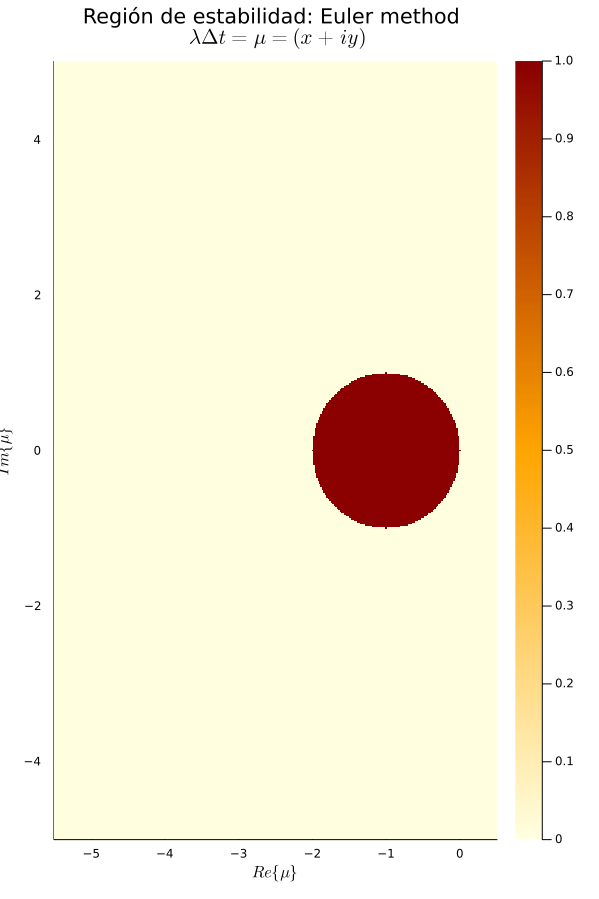

In [6]:
heatmap(x,y,(x,y)->indicador_estabilidad(x+y*1.0*im,Euler()),
xlabel="\$Re\\{ μ \\}\$",
ylabel="\$Im\\{ μ \\}\$",
title="Región de estabilidad: Euler method \n \$λΔt=μ=(x+iy)\$")

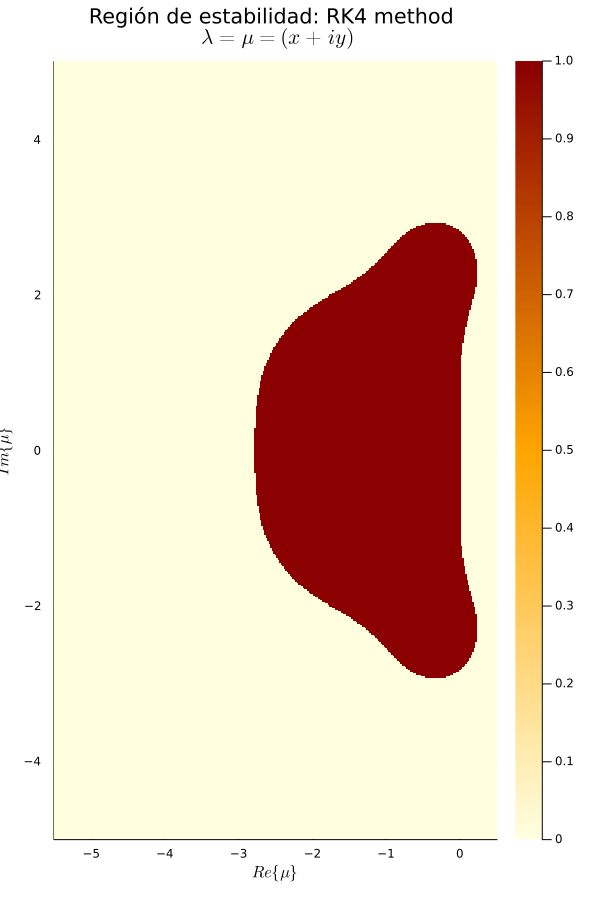

In [71]:
heatmap(x,y,(x,y)->indicador_estabilidad(x+y*1.0*im,RK4()),
xlabel="\$Re\\{ μ \\}\$",
ylabel="\$Im\\{ μ \\}\$",
title="Región de estabilidad: RK4 method \n \$λ=μ=(x+iy)\$")

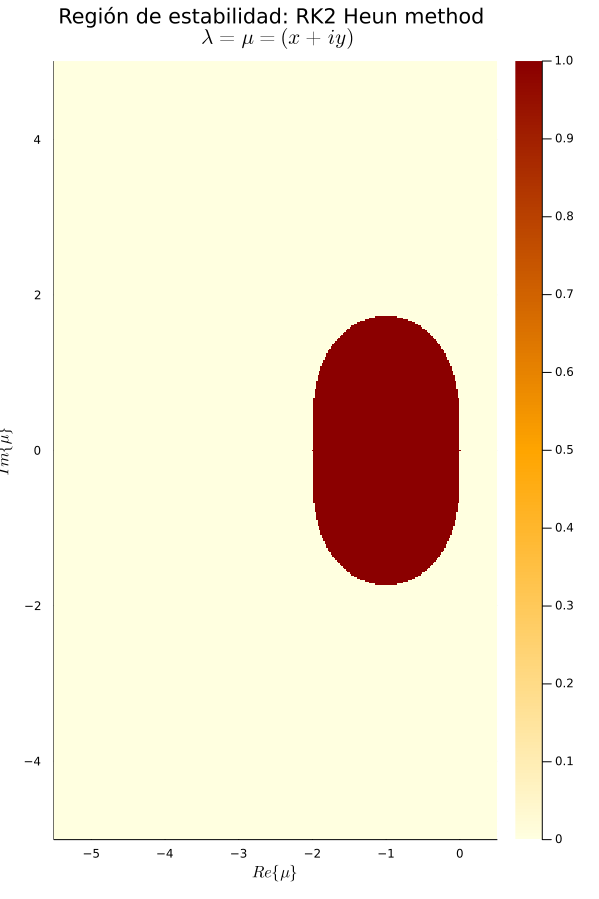

In [72]:
heatmap(x,y,(x,y)->indicador_estabilidad(x+y*1.0im,Heun()),
xlabel="\$Re\\{ μ \\}\$",
ylabel="\$Im\\{ μ \\}\$",
title="Región de estabilidad: RK2 Heun method \n \$λ=μ=(x+iy)\$")

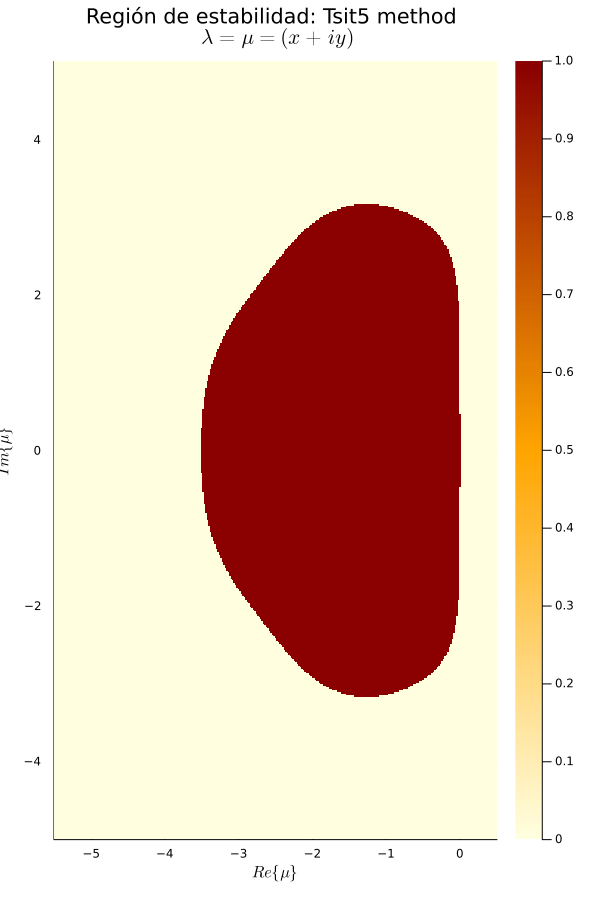

In [73]:
heatmap(x,y,(x,y)->indicador_estabilidad(x+y*1.0im,Tsit5()),
xlabel="\$Re\\{ μ \\}\$",
ylabel="\$Im\\{ μ \\}\$",
title="Región de estabilidad: Tsit5 method \n \$λ=μ=(x+iy)\$")

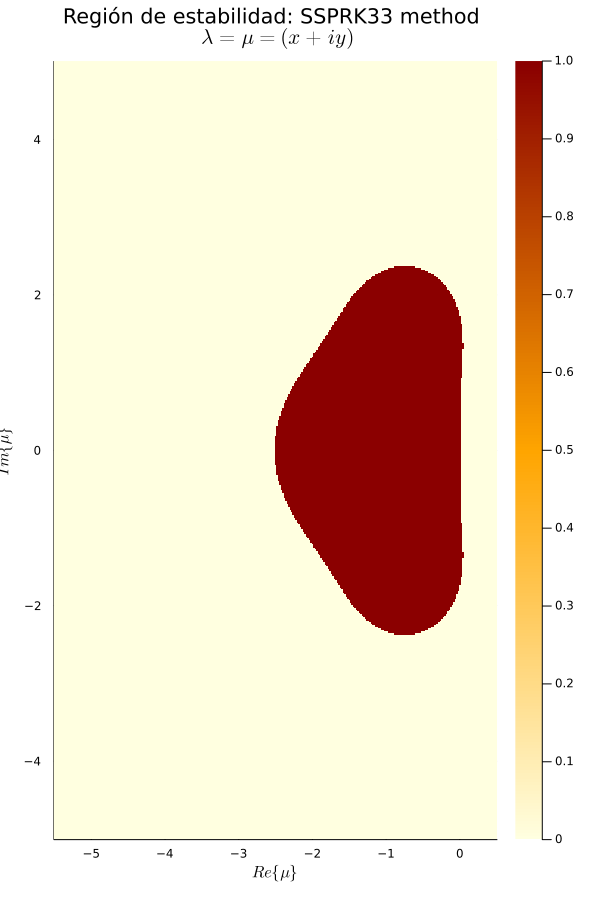

In [74]:
heatmap(x,y,(x,y)->indicador_estabilidad(x+y*1.0im,SSPRK33()),
xlabel="\$Re\\{ μ \\}\$",
ylabel="\$Im\\{ μ \\}\$",
title="Región de estabilidad: SSPRK33 method \n \$λ=μ=(x+iy)\$")